# Introducción

Vamos a utilizar este apartado para dar una ligeras pinceladas sobre una primera aproximación ak uso de qiskit para trabajar en el mundo de la programación cuántica.

La página oficial de qiskit la podemos encontrar fácilmente <a href="https://www.ibm.com/quantum/qiskit" target="_blank"> en esta dirección web </a>. En este sitio web podemos encontrar muchísima información que nos ayudará a comprender cómo utilizar esta herramienta, aunque bien es cierto que quizá la curva de aprendizaje sea un poquito empinada.

Esta herramienta de desarrollo de software ha sido creada por IBM con la finalidad de trabajar con computadoras cuánticas a nivel de circuitos, pulsos y algoritmos. Con este conjunto de elementos se pueden crear y manipular programas cuánticos y ejecutarlos en dispositivos cuánticos prototipo de IBM Quantum Experience o en simuladores de una computadora local.

Esta plataforma tiene un riquísimo  ecosistema constuido por una gran cantidad de plataforma que se <a href="https://qiskit.github.io/ecosystem/ target="_blank"> pueden encontrar en este enlace </a>. Dos elementos más oídos de este amplísimo ecosistema son *Terra* y *Aer* que junto con otros que <a href="https://qiskit.org/documentation/stable/0.24/the_elements.html" target="_blank"> se pueden ver en este enlace </a>, constituyen un amplísimo elenco de herramientas para poder trabajar dentro del mundo cuántico.

Entramos en materia viendo algunos de los elementos que se deben importar para tarabajar con este paquete de sofware ( existen muchos más elementos en esta librería que constituyen su API y que el lector <a href="https://qiskit.org/documentation/apidoc/" target="_blank"> puede encontrar en este enlace </a>).

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

(qiskit_textbook)=
## qiskit_textbook

Dentro de las muchas utilidade de aprendizaje que nos ofrecen en la plataforma qiskit, se encuentra *qiskit_textbook*, que en el momento de redactar estas lineas lo tienen emplazado en esta dirección web: <a href="https://learning.quantum.ibm.com/" target="_blank">https://learning.quantum.ibm.com/</a>

NOTA: El paquete qiskit_textbook *no se instala directamente con qiskit*, es preciso instalarlo de la siguiente manera, pero ojo, antes hay que tener instalado git en la computadora y añadir en la variable patch de las variables de entorno donde está instalado el programa git.exe.


Para ver más sobre esta materia visitar este enlace https://qiskit.org/textbook/ch-prerequisites/setting-the-environment.html

In [2]:

#!pip install git+https://github.com/qiskit-community/qiskit-textbook.git #subdirectory=qiskit-textbook-src

Es de advertir que en el momento de escribir este apartado, IBM está en proceso de modificación de la herramienta de aprendidaje  *qiskit_textbook*, y si entramos en su antigüa dirección web ( <a href="https://qiskit.org/textbook/widgets-index.html" target="_blank">https://qiskit.org/textbook/widgets-index.html </a>), en ella ya se nos indica una nueva dirección más actualizada que se encuentra en <a href="https://learning.quantum.ibm.com/" target="_blank") https://learning.quantum.ibm.com/ </a>.

```{index} Quantum Composer, Quantum Lab
```

En la nueva dirección y en el partado titulado **Tools* se nos presenta las dos plataformas siguientes:

* Quantum Composer, el cual sirve para construir, simular y ejecutar circuitos con una interfat del tipo drag-and-drop

* Quantum lab, que nos facilita un entorno de jupyter lab con todos los módulos cargados para poder trabajar directamente con las herramientas implementadas en esta plataforma.

  A continuación mostramos un pequeño widget sobre cómo intercambiar información entre números decimales y binarios.

In [3]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

Una de la herramientas muy útiles dentro del mundo Python es poder incorporar latex en las salidas correpondientes. Para esto se suele utilizar el paquete *pylatexenc* y su instalación se puede hacer desde pip, con una instrucción similar a la que sigue (se debe descomentar si el lector la quiere instalar en su equipo).

In [4]:
#!pip install pylatexenc

Para irnos familiarizando con la construcción de circuitos, a continuación se muestra en código sencilla que crea un circuito cuántico muy sencillo, constituido por  8 qubits y que simplemente lo que hace es una medición de los mismos. Posteriormente con la tercera línea de código, se procede a mostrar el circuito. Se le añade initial_state=True para que se muestren los estados iniciales, y output='mpl' para obtener una salidad gráfica más estética, utilizando para ello el paquete matplotlib.

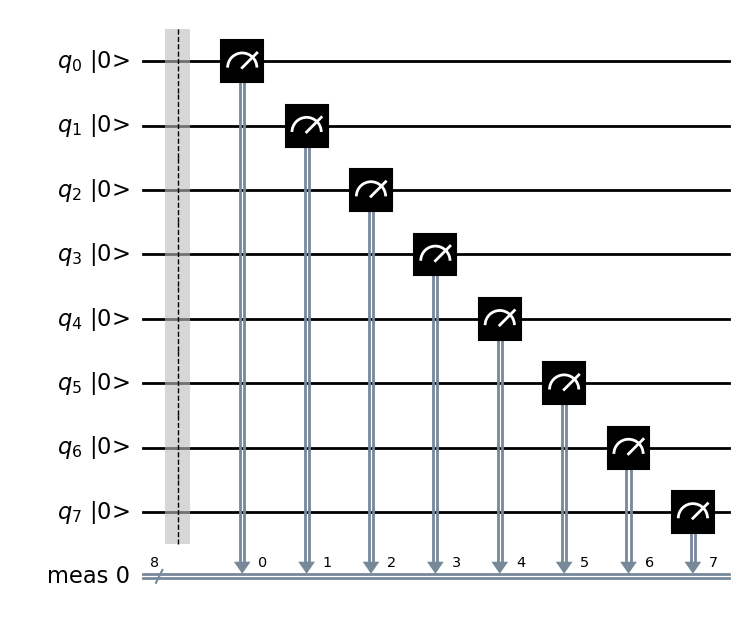

In [5]:
qc_output = QuantumCircuit(8)
qc_output.measure_all()
qc_output.draw(initial_state=True, output='mpl') 

El código siguiene necesita tener instalado qiskit-aer ( se puede ver  <a href="https://qiskit.org/ecosystem/aer/getting_started.html" target="_blank">en este enlace</a>), lo podemos hacer con el código siguiente:

In [6]:
#!pip install qiskit-aer

Como la programación cuántica, a diferencia de la tradicional opera mediante probabilidades, lo que suele hacerse en ejecutar el circuito una serie de veces y ver hacia qué estado colapsa en cada medición. Por defecto, la ejecución del circuito se hace un total de 1024 veces, y en uestro caso, como no hemos añadido ninguna puerta cuántica, pues el resultado que se obtiene es siempre el mismo, es decir el estado inicial del que se parte. Esto se suele obtener utilizando un diagrama de barras mediante el comando *plot_histogram*.

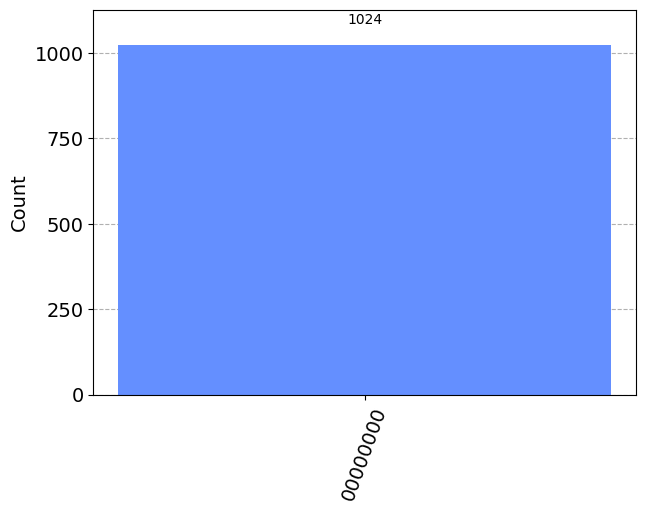

In [7]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

Veamos el contenido del resultado, almacenado en la variable counts

In [8]:
counts

{'00000000': 1024}

Como puede verse el resultado se obtiene en un diccionario de Python, donde el índice es la composición de estados hacia la que colapsa, y el valor es el número de veces que colapsa hacia ese ese estado. 

Una simulación de esta situación lo podemos recrear mediante el siguiente código, donde creamos un diccionario conteniendo los cuatro estados posibles de una base al trabajar con dos qubits, e indicando el núemro de veces que se obtienen esos resultados. La representación gráfica también se muestra a continuación del código.

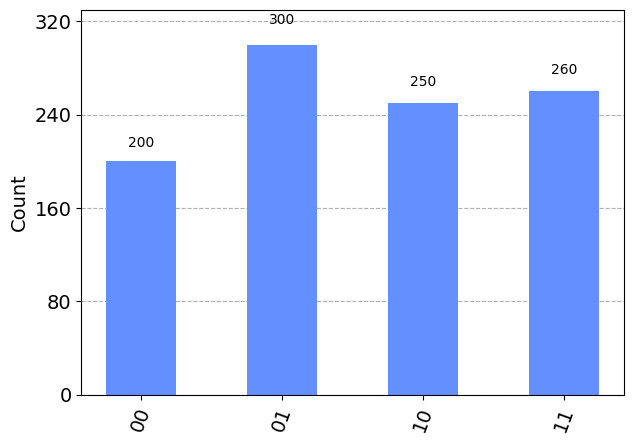

In [9]:
resul={'00':200,'01':300,'10':250,'11':260}
plot_histogram(resul)

## Elementos básicos de qiskit.

Vamos a continuar en este apartado estudiando y conociendo algunas de las herramientas que podemos utilizar con qiskit. Vamos a trabajar con dos qubits y les vamos a aplicar una puerta de H y una CNOT. Lo hacemos de la siguiente manera

In [10]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

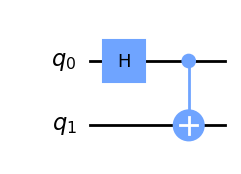

In [11]:
# creamos el circuito con dos qubits
qc_AB = QuantumCircuit(2)
#aplicamos una puerta h
qc_AB.h(0)
# Aplicamos una puerta CNOT
qc_AB.cx(0,1)
qc_AB.draw('mpl')

Una vez construido el circuito, podemos obtener el vector de estado del mismo, utilizando el método *Statevector.from_instruction()* del paqute qiskit.quantum_info:

In [12]:
psi_AB = qi.Statevector.from_instruction(qc_AB)
psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

Como puede verse, esta es la manera de poder obtener el primer estado de Bell, que como ya sabemos es un estado entrelazado muy utilizado en la programación cuántica.

```{index} Matriz de densidad
```
### Obtención de la matriz de densidad (density matrix).

La matriz de densidad no es otra cosa más que el [producto externo (outer product)](outer) de un estado por sí mismo. Por lo tanto, si estamos tabajando sobre n qubits, la matriz de densidad sería una matriz de tamaño $2^{n}$.

Es decir:

$\rho=\left[\begin{array}{c}
\alpha_{0}\\
\alpha_{1}\\
\vdots\\
\alpha_{n-1}
\end{array}\right]\left[\begin{array}{cccc}
\alpha_{0}^{*} & \alpha_{1}^{*} & \cdots & \alpha_{n-1}^{*}\end{array}\right]$

En nuestro caso concreto tendremos:

$$\rho=\frac{1}{\sqrt{2}}\left[\begin{array}{c}
1\\
0\\
0\\
1
\end{array}\right]\left(\frac{1}{\sqrt{2}}\left[\begin{array}{cccc}
1 & 0 & 0 & 1\end{array}\right]\right)=\frac{1}{2}\left[\begin{array}{cccc}
1 & 0 & 0 & 1\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
1 & 0 & 0 & 1
\end{array}\right]$$

La forma de obtener este mismo resultado con qiskit es la siguiente:

In [13]:
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

```{index} plot_state_city
```
La matriz de densidad la podemos representar de forma gráfica, mediante la clase *plot_state_city*

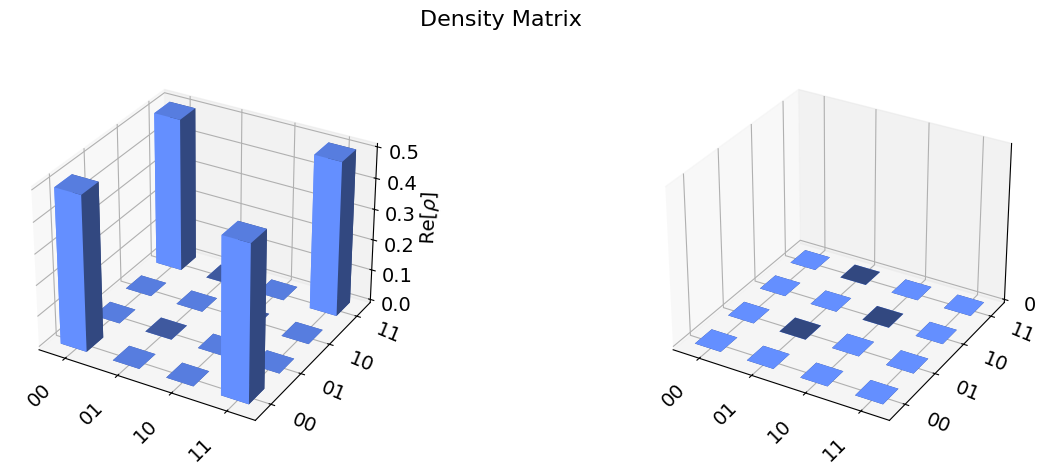

In [14]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')

A continuación vamos a aplicar de forma práctica lo visto anteriormente.

Vamos a suponer que tenemos los siguientes estados cuánticos

1.-  ${\frac{1}{\sqrt{2}}}{\Big(}|0\rangle-i|1\rangle{\Big)}$

2.- ${\textstyle\frac{1}{2}}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

Veamos primero el caso 1.

Definimos el vector de estado de la siguiente manera

In [15]:
from numpy import sqrt

sv=qi.Statevector([1/sqrt(2), (0-1j)/sqrt(2)])

In [16]:

sv.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

In [17]:
# calculamos la matriz de densidad

rho_AB = qi.DensityMatrix(sv)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

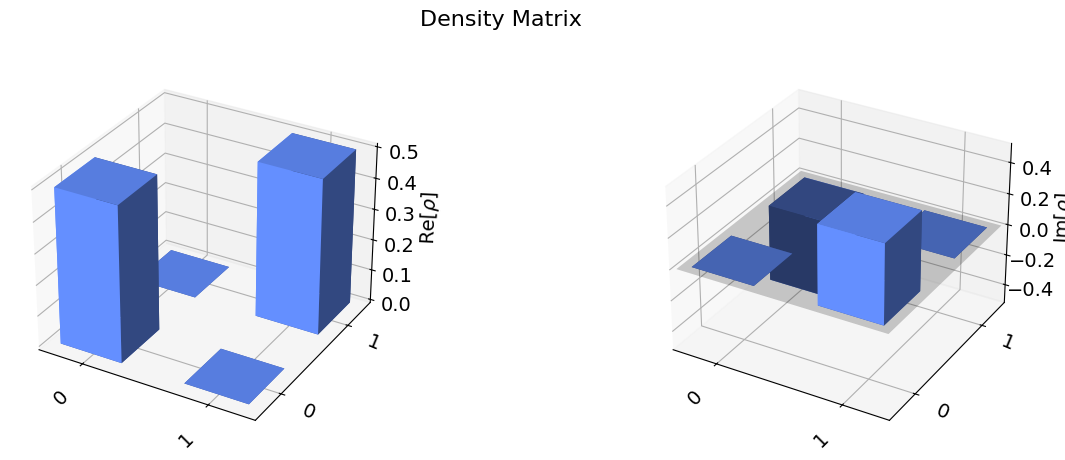

In [18]:
plot_state_city(rho_AB.data, title='Density Matrix')

Veamos ahora el segundo caso.

In [19]:
sv=qi.Statevector([1/2,1/2,1/2,1/2])
sv.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

In [20]:
# calculamos la matriz de densidad

rho_AB = qi.DensityMatrix(sv)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

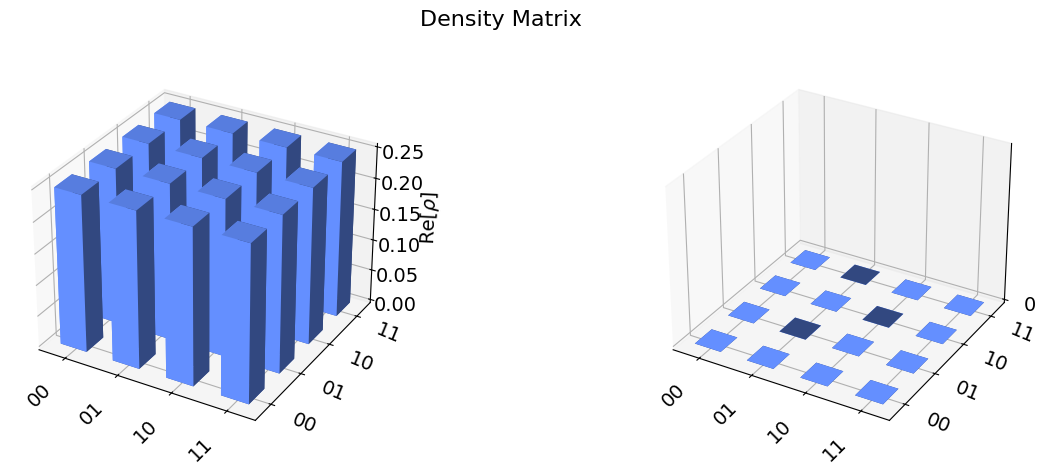

In [21]:
plot_state_city(rho_AB.data, title='Density Matrix')

## Creando circuitos básicos

En este apartado vamos a iniciar a crear un circuito muy básico con qiskit a fin de que el lector vaya tomando contacto con esta posibilidad tan importante que ofrece qiskit.

Comenzamos cargando algunas librerías necesaria

In [22]:
import numpy as np
from qiskit import *

# Creamos un circuito de dos qubits
circ = QuantumCircuit(2)

In [23]:
# Le añadimos una puerta de Hadamard y otra CNOT
circ.h(0)
circ.cx(0,1)

### Visualizando circuitos

Utilizaremos matplotlib para ver el circuito que acabamos de crear

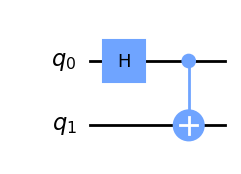

In [24]:
circ.draw('mpl')

El circuito anterior, nos va a generar un estado cuánticoigual a 

$$\vert\psi\rangle=(\vert00\rangle+\vert11\rangle)/\sqrt{2}.$$

Veámoslo con las siguientes lineas de código

In [25]:
from qiskit.quantum_info import Statevector

state = Statevector.from_int(0,2**2)

state = state.evolve(circ)
state.draw('latex')

<IPython.core.display.Latex object>

In [26]:
# Otra forma alternativa de representación las amplitudes
from qiskit.visualization import array_to_latex
array_to_latex(state)


<IPython.core.display.Latex object>

Qiskit nos permite hacer representaciones gráficas de los qubits, a continuación mostramos dos de ellas. La primera es la representación sobre una esfera de Bloch y la segunda la denominada *hinton*

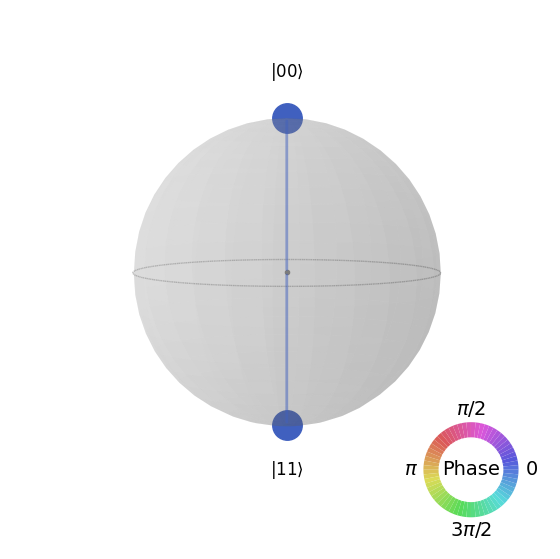

In [27]:
state.draw('qsphere')

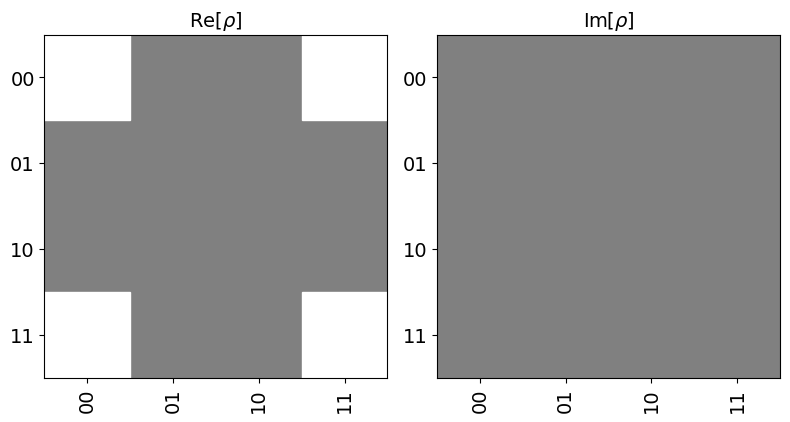

In [28]:
state.draw('hinton')

Igualmente se puede obtener la matriz unitaria de la composición anterior, de la siguiente manera

In [29]:
from qiskit.quantum_info import Operator

U = Operator(circ)

U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
         0.        +0.j]])

### qiskit Aer

Qiskit Aer es un paquete para simular circuitos cuánticos y contiene muchos *backends* para hacer este tipo de simulaciones. Pero hay uno básico que viene con la distribución de Terra denominado *BasicAer* que vamos a utilizar a continuación para calcular el vector de estado o la matriz unitaria.

#### Backend del vector de estado

Veamos esta forma de conseguir el vector de estado de circuito anterior.

In [30]:
from qiskit import Aer

backend = Aer.get_backend('statevector_simulator')
job=backend.run(circ)
result = job.result()
vectorEstado = result.get_statevector(circ, decimals=2)
print(vectorEstado)

Statevector([0.71+0.j, 0.  +0.j, 0.  +0.j, 0.71+0.j],
            dims=(2, 2))


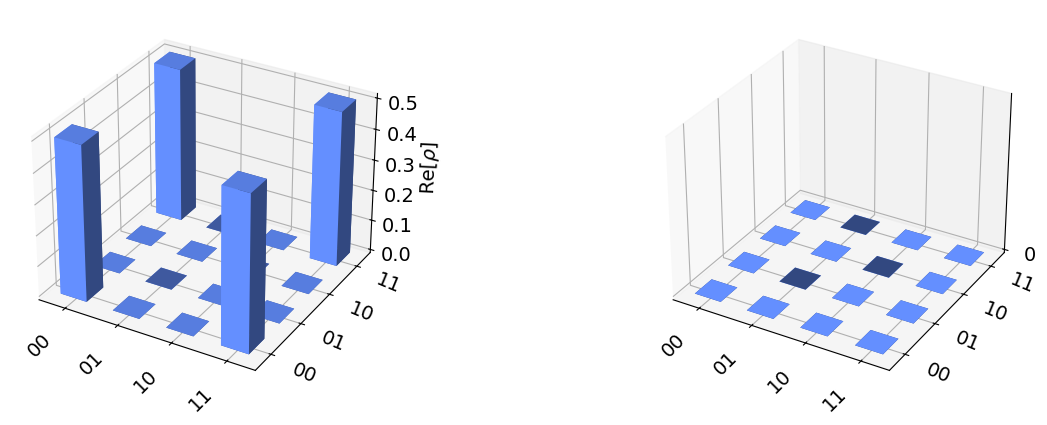

In [31]:
from qiskit.visualization import plot_state_city
plot_state_city(vectorEstado)

#### Backend de la matriz unitaria

Obtengamos la matriz unitaria de esta composición

In [32]:


backend = Aer.get_backend('unitary_simulator')
job = backend.run(circ)
result = job.result()
print(result.get_unitary(circ, decimals=3))

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


#### Backend OpenQASM

Obtengamos ahora los resultados de medir las proyecciones sobre los elementos de la base. Para conseguir esta información, debemos añadir alguna instrucción al código anterior, para al final poder hacer una medición del circuito.

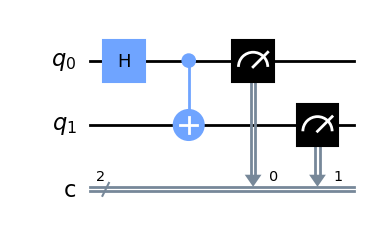

In [33]:
circ = QuantumCircuit(2,2)
circ.h(0)
circ.cx(0,1)
circ.measure(range(2),range(2))

circ.draw('mpl')

In [34]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = backend_sim.run(transpile(circ, backend_sim), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)

{'11': 503, '00': 521}


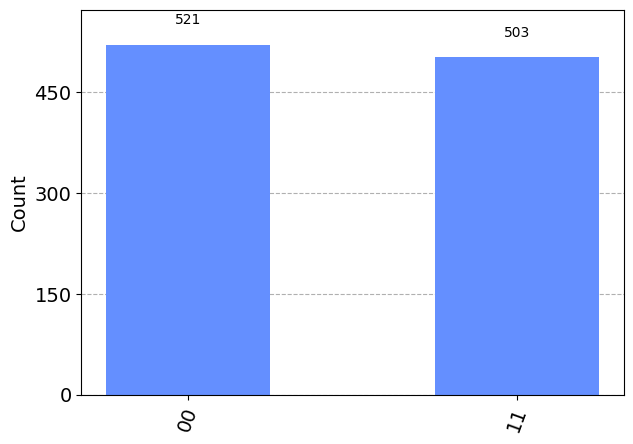

In [35]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

También se puede utilizar *AerSimulator* del paquete Aer para conseguir esta información

In [36]:
from qiskit.providers.aer import AerSimulator
backend = AerSimulator()

qc_compiled = transpile(circ, backend)

job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)
print(counts)



{'11': 510, '00': 514}


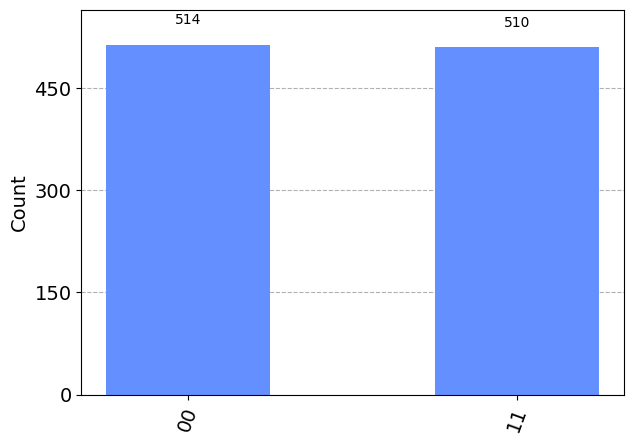

In [37]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Circuito para sumar

A modo de introducción y con la finalidad de que el lector pueda ver una aplicación práctica de estos circuitos cuánticos, a continuación mostramos un código que sirve para obtener simples sumas. 

No es necesario que el lector conozca con detalle lo que se hace en el código anterior, simplemente se expone para que se pueda ver circuitos más complejos en funcionamiento.

In [38]:
# suma de 1+1 en base 2 que es 10 en base dos que es 2 en decimal
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

In [39]:
# suma de 0+1 en base 2 que es 1 o 01
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
#qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

░                 ░       
q_0: ──────░───■─────────■───░───────
     ┌───┐ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

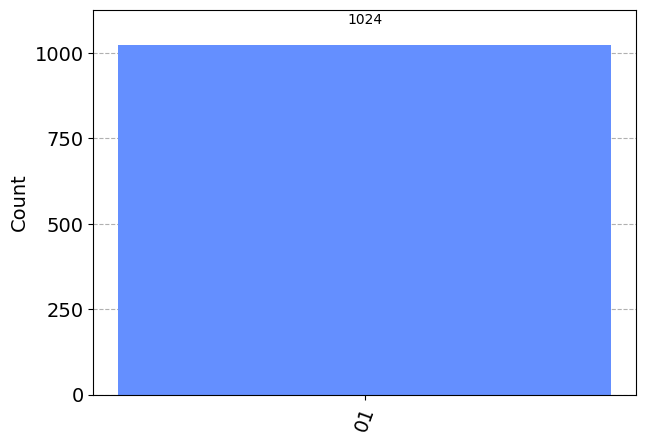

In [40]:
#qobj = assemble(qc_ha)
sim = Aer.get_backend('aer_simulator') 
counts = sim.run(qc_ha).result().get_counts()
#counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [41]:
# suma de 1+0 en base 2 que es 1 
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
#qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     └───┘ ░   │         │   ░       
q_1: ──────░───┼────■────■───░───────
           ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

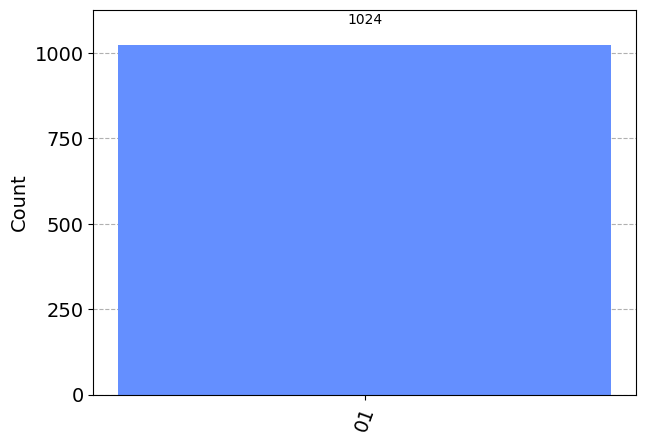

In [42]:
#qobj = assemble(qc_ha)
sim = Aer.get_backend('aer_simulator') 
#counts = sim.run(qobj).result().get_counts()
counts = sim.run(qc_ha).result().get_counts()
plot_histogram(counts)